# Matplotlib For Publication - Exercises Day 1

This is a collection of astronomy-themed exercises to help you learn how to plot some real data with Matplotlib. Some of these exercises will be added to in the Day 2 exercise blocks, so do try them all. Not all of them require you to code everything from scratch, so don't stress too much.

**Make sure `exoplanets_5245_EarthUnits.csv` is saved to the same working directory as this notebook.**

For most of these exercises, you will play with a cleaned and curated version of a somewhat recent release of the NASA exoplanet database, featuring 5245 confirmed exoplanets, that was published on the Kaggle. Some of the units have been changed from the original document so that you can focus on plotting (e.g. most gas giant planets had their masses and radii reported in Jupiter units, but have been converted to Earth units).

Here are the column names and descriptions (the source document has a few more columns that we'll ignore):
- `'name'`: exoplanet name. The convention is the star's catalog name followed by a lowercase letter, starting with b and progressing alphabetically in order of discovery 
- `'planet_type'`: values include "Gas Giant" (like Jupiter or Saturn), "Neptune-like" (sort of a mini gas giant or ice giant), "Super Earth" (thought to be rocky but up to a few times larger than Earth), and "Terrestrial" (comparable to or smaller than Earth). There is also at least one "Unknown".
- `'discovery_yr'`: year that the discovery of the planet was published
- `'mass_ME'`: mass of the planet in units of Earth masses (1 Earth mass = $5.972 \times 10^{24}$ kg)
- `'radius_RE'`: radius of the planet in units of Earth masses (1 Earth radius = 6371 km)
- `'orbital_radius_AU'`: the exoplanet's orbital semi-major axis in units of the average distance between the Earth and Sun (1 Astronomical Unit, or AU)
- `'orbital_period_yr'`: the time taken for the exoplanet to orbit its star in units of Earth's year
- `'detection_method'`: principle method used to detect the planet. See [this educational slideshow by NASA](https://exoplanets.nasa.gov/alien-worlds/ways-to-find-a-planet/) or [this Wikipedia page](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets) for more details.

We'll start by importing the modules and data:

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#only required for Jupyter

#mpl.rcParams.update(mpl.rcParamsDefault)
exos = np.genfromtxt('exoplanets_5245_EarthUnits.csv',delimiter=',', usecols=[0,3,4,5,6,7,8,10],
                     dtype=None,names=True, encoding='ascii')

#take a quick peak at the data so we know how to call it
print(exos.dtype.names)
print(exos[np.where(exos['name']=='55 Cancri e')])

('name', 'planet_type', 'discovery_yr', 'mass_ME', 'radius_RE', 'orbital_radius_AU', 'orbital_period_yr', 'detection_method')
[('55 Cancri e', 'Super Earth', 2004, 7.99, 1.875, 0.01544, 0.0019165, 'Radial Velocity')]


#### Exercise 1-A.

Make a bar plot of the planet types. The counts of each planet type have been calculated for you. Label the y-axes "Counts" and make each bar a different color.

The comments in the code block below, and for all subsequent exercise code blocks, provide step-by-step instructions in comments to walk you through the process. The number of blank lines below each comment line is the number of lines of code needed for each step described in the comment.

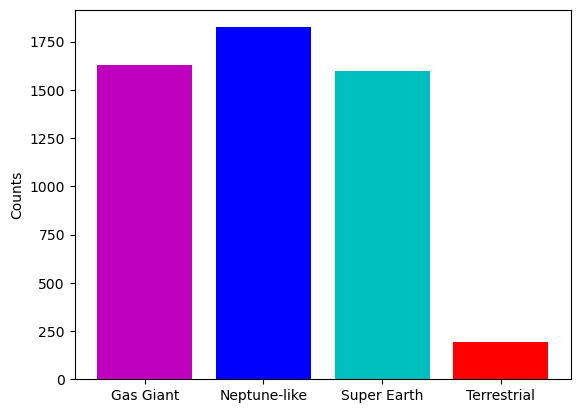

In [7]:
ptypes, counts = np.unique(exos['planet_type'], return_counts=True)
# instantiate fig, axes:
fig,ax = plt.subplots()
# make the bar plot:
ax.bar(ptypes, counts, color=['m','b','c','r','g'])
# add the y-axis label:
ax.set_ylabel("Counts")
# show the plot:
plt.show()

#### Exercise 1-B.

Copy and modify the code block above to make a horizontal bar plot of the detection methods. Make the x-axis scale logarithmic. 

You don't need to make the bars different colors, but if you want to without having to specify them all manually, you can set ``color=[c["color"] for c in mpl.rcParams["axes.prop_cycle"]]``.
This will automatically cycle through the default color cycler, even returning to the top of the order when the 11th category is reached.

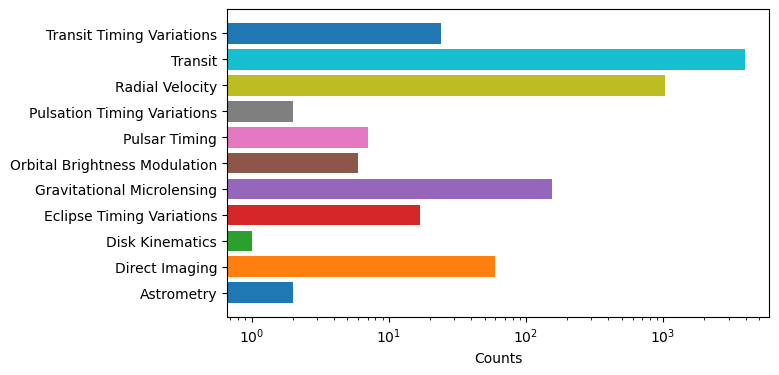

In [54]:
import matplotlib as mpl #for color trick
dms, counts = np.unique(exos['detection_method'], return_counts=True)
# instantiate fig, axes:
fig,ax = plt.subplots(figsize=(7,4))
# make the bar plot:
ax.barh(dms, counts, color=[c['color'] for c in mpl.rcParams["axes.prop_cycle"]])
# add the xaxis label:
ax.set_xlabel("Counts")
# rescale the x-axis:
ax.set_xscale('log')
# show the plot:
plt.show()

#### Exercise 2.
Here I've provided planet mass and orbital radius (technically semi-major axis) data with uncertainties for the Kepler-11 system (chosen because it has a relatively large number of confirmed planets with narrow ranges of mass and orbital size). Planet masses are in units of Earth's mass, and orbital radii are in units of AU (the average distance to the Sun from Earth). 

Make an error-bar plot of these data. Put orbital radius on the x-axis and planet mass on the y-axis. Disable the line connecting the points by setting `linestyle='None'`. 

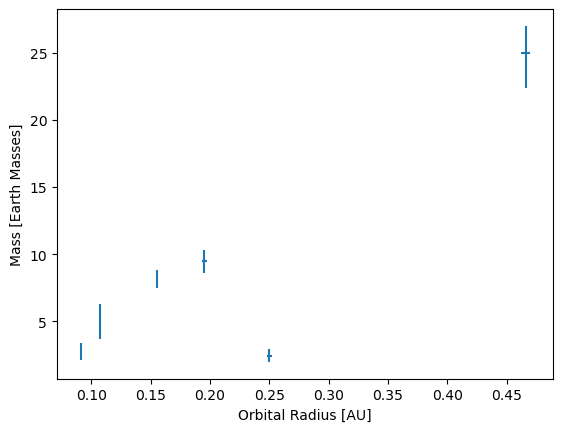

In [64]:
orb_rad_au = [0.091, 0.107, 0.155, 0.195, 0.250, 0.466]
orb_rad_errs = [0.001, 0.001, 0.001, 0.002, 0.002, 0.004]
mass_me = [2.78, 5.0, 8.13, 9.48, 2.43, 25]
mass_errs = [[0.66, 1.35, 0.66, 0.88, 0.45, 2.6],[0.64, 1.3, 0.67, 0.86, 0.49, 2.0]]

## instantiate fig, ax:
fig,ax = plt.subplots()
# plot errorbar plot
ax.errorbar(orb_rad_au, mass_me, xerr=orb_rad_errs, yerr=mass_errs, ls='None')
#label axes
ax.set_xlabel('Orbital Radius [AU]')
ax.set_ylabel('Mass [Earth Masses]')
#show the plot
plt.show()

#### Exercise 3-A.
First, plot the exoplanet masses against the orbital periods as a hexbin plot with logarithmic bins and axes.

Then, on top of the hexbin plot, plot the masses and orbital periods of the given Solar System planets on top as a loglog plot with a marker of your choice (if you can't decide, `'rX'` is a good choice for contrast). Label this plot and display a legend on the plot that indicates the overlaid points are planets of the Solar System.

Just label the colorbar "Counts", and don't worry if the x-axis doesn't show every decade. We'll fix the axes scales in the next part.

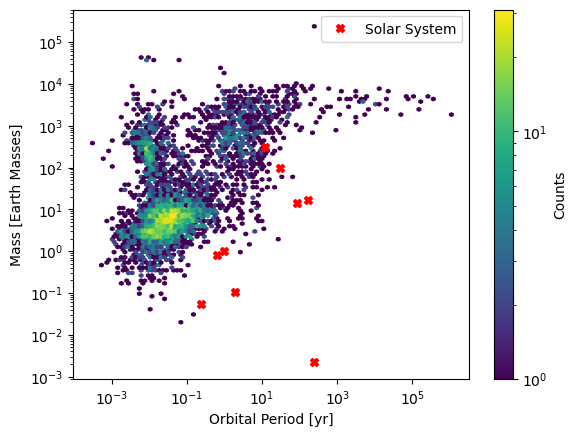

In [93]:
solsys = {'name': np.array(['Mercury','Venus','Earth','Mars',
                            'Jupiter','Saturn','Uranus','Neptune','Pluto']),
         'mass_ME': np.array([0.0553,0.815,1.0,0.107,
                              317.8,95.2,14.5,17.1, 0.0022]),
         'orbital_period_yr': np.array([0.241,0.615,1.0,1.88,
                                        11.9,29.4,83.7,163.7, 247.9])}

# instantiate fig, ax:
fig,ax2 = plt.subplots()
# plot hexbin plot
## (remember to set axes scales and bin scales in hexbin()!):
hb = ax2.hexbin(exos['orbital_period_yr'], exos['mass_ME'],
               xscale='log', yscale='log', bins='log')
# make colorbar for hexbin plot:
fig.colorbar(hb, ax=ax2, label='Counts')
# label axes:
ax2.set_xlabel('Orbital Period [yr]')
ax2.set_ylabel('Mass [Earth Masses]')
# plot the solar system data on top:
ax2.loglog(solsys['orbital_period_yr'], solsys['mass_ME'],'rX', label='Solar System')
# add a legend:
ax2.legend()
# show the plot:
plt.show()

#### Exercise 3-B.
In the previous plot, you should see that not all decades are shown on the horizontal (Orbital Period) axis.

Copy the code from 3-A to the cell below and add major tick locators every decade and minor tick locators every 2 tenths of a decade along the horizontal axis. Refer to slide 35 in the lecture material. Don't forget to turn off the minor axis tick labels!

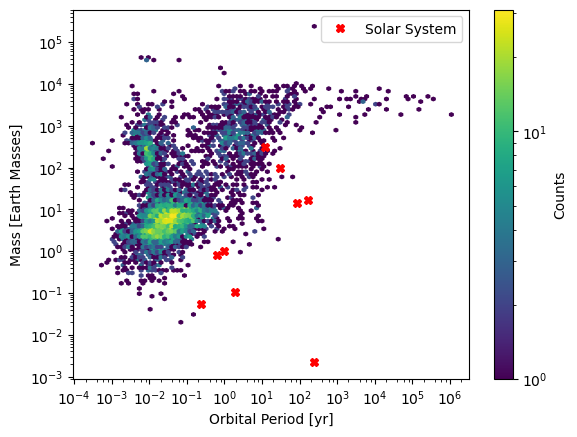

In [68]:
# instantiate fig, ax:
fig,ax2 = plt.subplots()
# plot hexbin plot
## (remember to set axes scales and bin scales in hexbin()!):
hb = ax2.hexbin(exos['orbital_period_yr'], exos['mass_ME'],
               xscale='log', yscale='log', bins='log')
# make colorbar for hexbin plot:
fig.colorbar(hb, ax=ax2, label='Counts')
# label axes:
ax2.set_xlabel('Orbital Period [yr]')
ax2.set_ylabel('Mass [Earth Masses]')
# plot the solar system data on top:
ax2.loglog(solsys['orbital_period_yr'], solsys['mass_ME'],'rX', label='Solar System')
# add a legend:
ax2.legend()

# Fix the x-axis:
# import matplotlib.ticker
from matplotlib import ticker
# set major locator
ax2.xaxis.set_major_locator(ticker.LogLocator(base=10, numticks=99))
# set minor locator
ax2.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=(0.2,0.4,0.6,0.8), numticks=99))
# turn off minor tick labels
ax2.xaxis.set_minor_formatter(ticker.NullFormatter())
# show the plot:
plt.show()

#### Exercise 4.
Subsets of the planet mass data have been computed for each of the 4 planet types, and have been log-scaled for visibility. Fill in the blanks of the code block below such that the code block produces, on the same figure,
1. a box plot, and 
2. a violin plot with `showmeans=True`.
of the (log) mass distributions by planet type. Adjust the `figsize` kwarg such that the labels on each plot remain readable and the plots themselves are roughly square.

In [45]:
giants = np.log10(exos['mass_ME'][np.where(exos['planet_type']=='Gas Giant')])
giants=giants[~np.isnan(giants)]
neptunes = np.log10(exos['mass_ME'][np.where(exos['planet_type']=='Neptune-like')])
supers = np.log10(exos['mass_ME'][np.where(exos['planet_type']=='Super Earth')])
terres = np.log10(exos['mass_ME'][np.where(exos['planet_type']=='Terrestrial')])

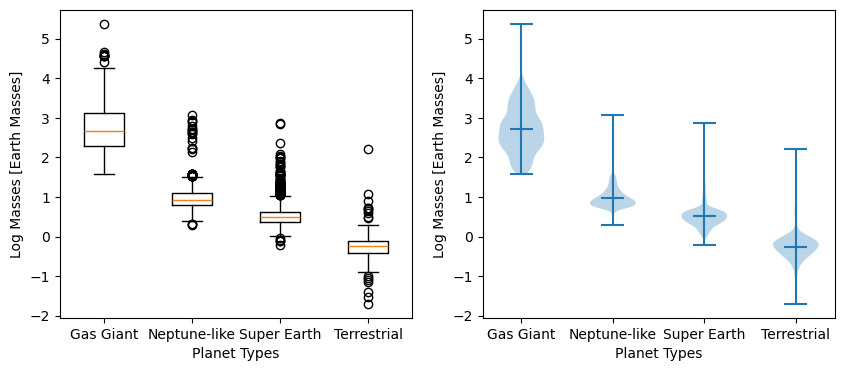

In [106]:
# instantiate fig, ax:
fig,axes = plt.subplots(ncols=2, figsize=(10,4))
# make the box plot:
axes[0].boxplot([giants, neptunes, supers, terres],
                labels=ptypes)
# make the violin plot:
axes[1].violinplot([giants, neptunes, supers, terres],showmeans=True)
axes[1].set_xticks([1,2,3,4],labels=ptypes)
# use loop to assign axes labels since they're identical
for ax in axes:
    ax.set_xlabel("Planet Types")
    ax.set_ylabel("Log Masses [Earth Masses]")
# show the plot
plt.show()

## Exercise 5.

The Solar System orbits the Milky Way about every 230 million years, at a radius of about 26000 light years from the Galactic Center. We also bob up and down through the plane of the Milky Way about every 60 million years. We're currently about 55 light years above\* the plane (\*the side we're on today is up purely by convention) and heading further out.

Next you'll make a 3D stem plot showing the Sun's motion since the KT extinction event that killed the non-avian dinosaurs. We'll let the z-axis scale be 1000 times the x- and y- axes scales to make the up-and-down motion visible. The x, y, and z data have been computed for you and 2-million-year increments; your task is simply to plot these data, label the axes, and give the plot a title. A couple of commands are included to improve your view of the data.

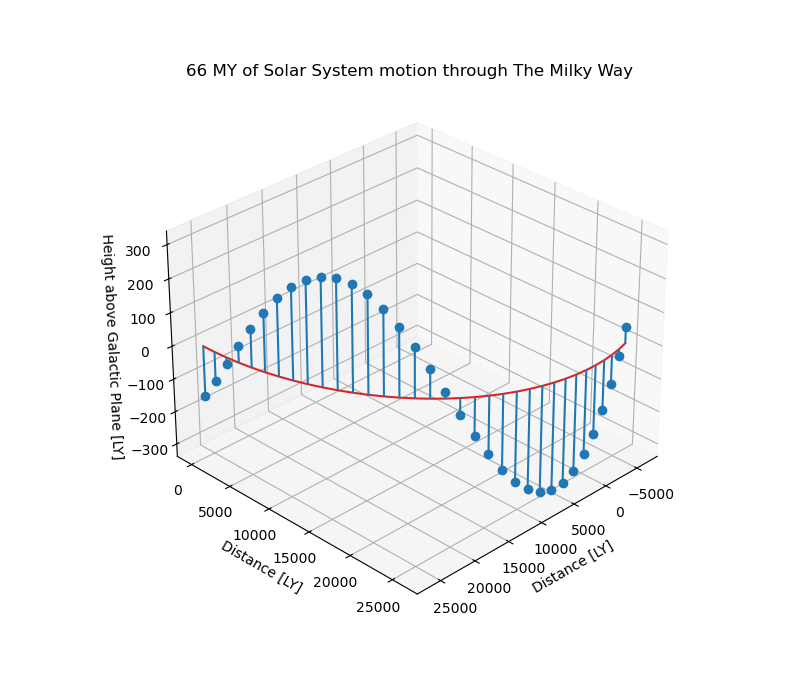

In [58]:
r = 26000. # our distance in LY from Galactic Center
thetas = np.arange(0,67,2)*(2*np.pi/230) #rads
xs = r*np.cos(thetas)
ys = r*np.sin(thetas)
zs = 326*np.sin((2*np.pi/60)*np.arange(-66,1,2)+0.15) 
#The 0.15 is the phase in rads at t=0 (now) where z(t) = +55 LY
#326 LY is the maximum amplitude

# This line fixes a 3d display bug in Jupyter
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None} 
# 
# instantiate ax with a 3D projection (couple of ways to do this)
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
# Add the stem plot. Feel free to play with colors and markers
ax.stem(xs,ys,zs)
# label the axes: "Distance [LY]" for x and y, "Height above Galactic Plane [LY]" for z
ax.set_xlabel('Distance [LY]')
ax.set_ylabel('Distance [LY]')
ax.set_zlabel('Height above Galactic Plane [LY]')
# title the plot
ax.set_title("66 MY of Solar System motion through The Milky Way")
# this rotates your view so it's easier to see. Feel free to play with the parameters shown
ax.view_init(elev=30, azim=45, roll=0)
# Show the plot
plt.show()

#the following resets InlineBackend so it doesn't cut off Y-axis labels if plots before this are executed later
%config InlineBackend.print_figure_kwargs = {}

### You did it!